# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [4]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [2]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Write your code here to read the data
df = pd.read_csv('foodhub_order.csv')

In [6]:
# Write your code here to view the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [7]:
# Write your code here
# Check for total columns and rows
df.shape

(1898, 9)

#### Observations:
Number of rows = 1898

Number of columns = 9


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [8]:
# Write your code here
# Check for the datatypes of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
The dataset contains a total of 1,898 entries, ranging from 0 to 1,897, which corresponds to the total number of rows present.

A total of 9 columns are found within the dataset, as detailed under the section labeled 'Data columns (total 9 columns)'.

The column named 'order_id' comprises 1,898 observations that are not null, each classified under the data type 'int64', as highlighted by 'order_id 1898 non-null int64'.

In terms of data types within the dataset, there are four columns classified as 'int64', four columns identified as 'object', and one column categorized under 'float64'.

The memory requirement for storing this dataframe is slightly over 133.6 KB.


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [9]:
# Write your code here
# Check for missing values
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations:
The output provided indicates the count of missing values present in each column.

From the information available, it is evident that there are no missing values in any of the columns.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [10]:
# Write your code here
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:
The table presented offers a statistical overview of all the columns within the dataframe.

The statistics pertaining to the time required for food preparation are as follows:

The minimum time observed is 20 minutes.

The average (mean) time is approximately 27.37 minutes.

The maximum time recorded is 35 minutes.

### **Question 5:** How many orders are not rated? [1 mark]

In [11]:
# Write the code here
df['rating'].value_counts()

,count
rating,
Not given,736
5,588
4,386
3,188


#### Observations:
Total number of orders not rated is equal to 736 (Not given)

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [12]:
# Write the code here
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


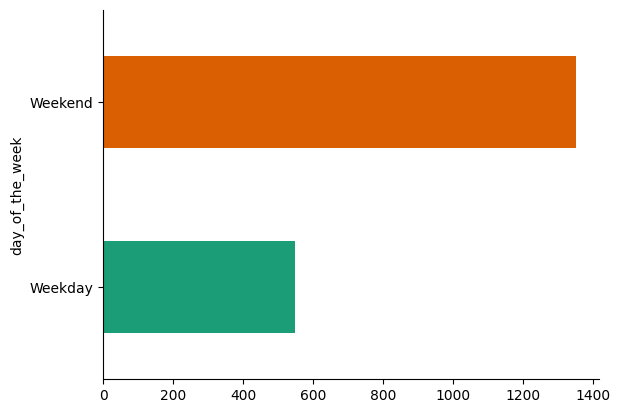

In [13]:
#plot distribution to check when more orders were made

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('day_of_the_week').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

The above plot clearly shows that more orders were made during the weekends

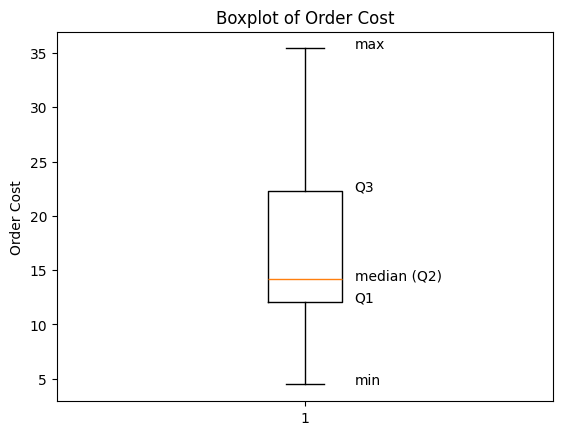

In [14]:
# plot a distribution of Order Cost
plt.boxplot(df['cost_of_the_order'])

plt.text(x = 1.1, y = df['cost_of_the_order'].min(), s ='min')
plt.text(x = 1.1, y = df.cost_of_the_order.quantile(0.25), s ='Q1')
plt.text(x = 1.1, y = df['cost_of_the_order'].median(), s ='median (Q2)')
plt.text(x = 1.1, y = df.cost_of_the_order.quantile(0.75), s ='Q3')
plt.text(x = 1.1, y = df['cost_of_the_order'].max(), s ='max')


plt.title('Boxplot of Order Cost')
plt.ylabel('Order Cost')

plt.show()

##Observations:
The above plot indicates that the median of order cost is close to Q1 rather than Q3 which means the oder cost is positively skewed

In [15]:
df.cuisine_type.value_counts()

,count
cuisine_type,
American,584
Japanese,470
Italian,298
Chinese,215
Mexican,77
Indian,73
Middle Eastern,49
Mediterranean,46
Thai,19


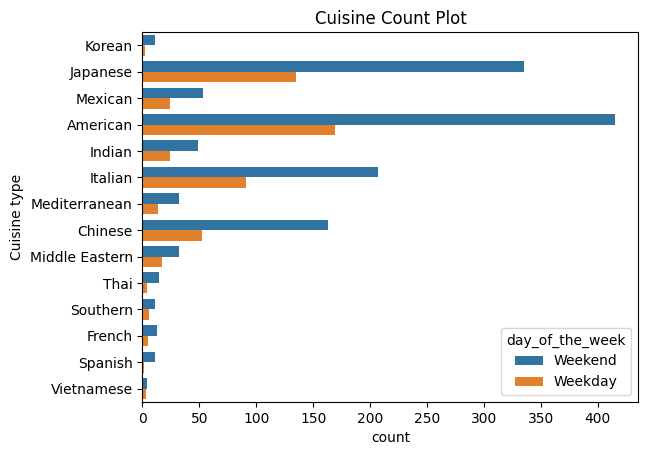

In [16]:
# count of observations for each cuisine_type based on day_of_the_week
sns.countplot(data = df, y = 'cuisine_type', hue = 'day_of_the_week')

plt.title('Cuisine Count Plot')
plt.ylabel('Cuisine type')
# display the plot
plt.show()

The above plot clearly shows that American cuisine is more popular on weekends followed by Japanese and Italian


### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [17]:
# Write the code here

# sort the top 5 restaurant and order of numbers recieved
df.restaurant_name.value_counts()[0:5]

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


#### Observations:
The five leading restaurants, based on the volume of orders received, are listed below:

Shake Shack, with a total of 219 orders.

The Meatball Shop, accumulating 132 orders.

Blue Ribbon Sushi, with 119 orders.

Blue Ribbon Fried Chicken, receiving 96 orders.

Parm, with a total of 68 orders.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

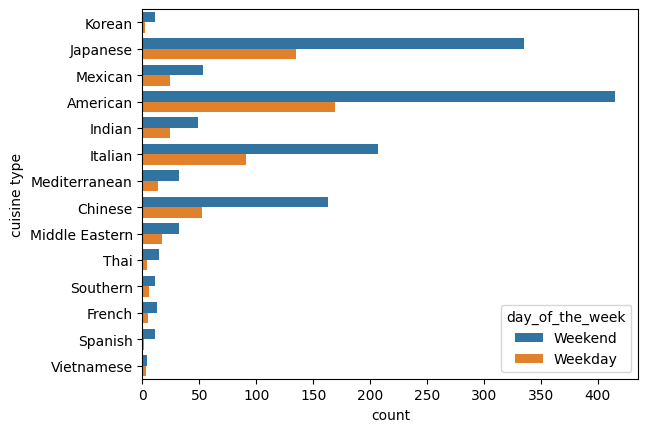

In [18]:
# Write the code here

# count of observations for each cuisine_type based on day_of_the_week
#'day_of_the_week' as hue parameter
sns.countplot(data = df, y = 'cuisine_type', hue = 'day_of_the_week')
plt.ylabel('cuisine type')
# display the plot
plt.show()

#### Observations:
From the above, the most popular cuisine on weekends is American

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [19]:
# Write the code here

## Conditional count function to find number of orders greater than $20
count=(df['cost_of_the_order']>20).sum()

#total numbers of orders
total=df.shape[0]

percentage_orders_greater_than_20=(count/total)*100
round(percentage_orders_greater_than_20,2)

np.float64(29.24)

#### Observations:
29.24% of the orders cost more than $20

### **Question 10**: What is the mean order delivery time? [1 mark]

In [20]:
# Write the code here

#Function to check the statistical mean summary of the data
df.describe()['delivery_time']

,delivery_time
count,1898.000000
mean,24.161749
std,4.972637
min,15.000000
25%,20.000000
50%,25.000000
75%,28.000000
max,33.000000


#### Observations:
The mean order delivery time is 24.16

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [21]:
# Write the code here
df.customer_id.value_counts()[0:3]

,count
customer_id,
52832,13
47440,10
83287,9


#### Observations:
Customer ID 52832, has placed a total of 13 orders.

Customer ID 47440, has a total of 10 orders.

Customer ID 83287, placed 9 orders in total.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


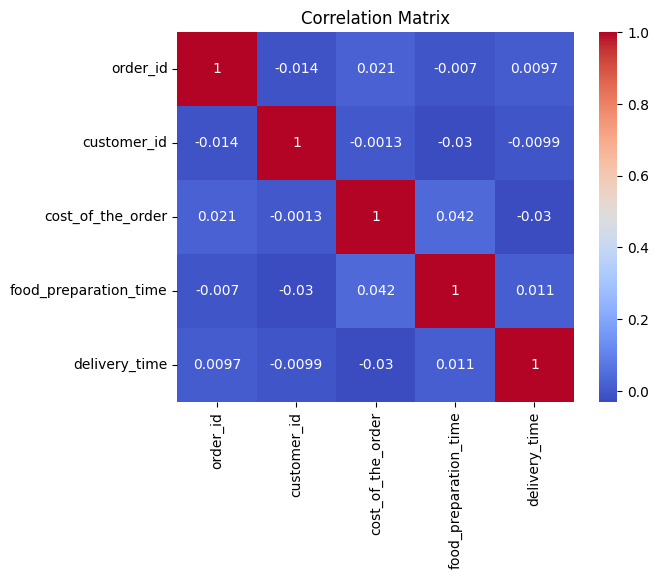

In [22]:
# Write the code here

#visual representation of the relationships between different numeric variables in the DataFrame.
corr_matrix = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [23]:
# Filter out rows where 'rating' is 'Not given'
df_filtered = df[df['rating'] != 'Not given']

# Convert the 'rating' column to numeric (integer)
df_filtered.loc[:, 'rating'] = pd.to_numeric(df_filtered['rating'], errors='coerce').astype('Int64')

# Display the filtered DataFrame
df_filtered


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30
...,...,...,...,...,...,...,...,...,...
1889,1478190,94152,RedFarm Broadway,Chinese,8.68,Weekday,3,33,30
1890,1477316,164776,TAO,Japanese,15.67,Weekend,5,20,22
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19


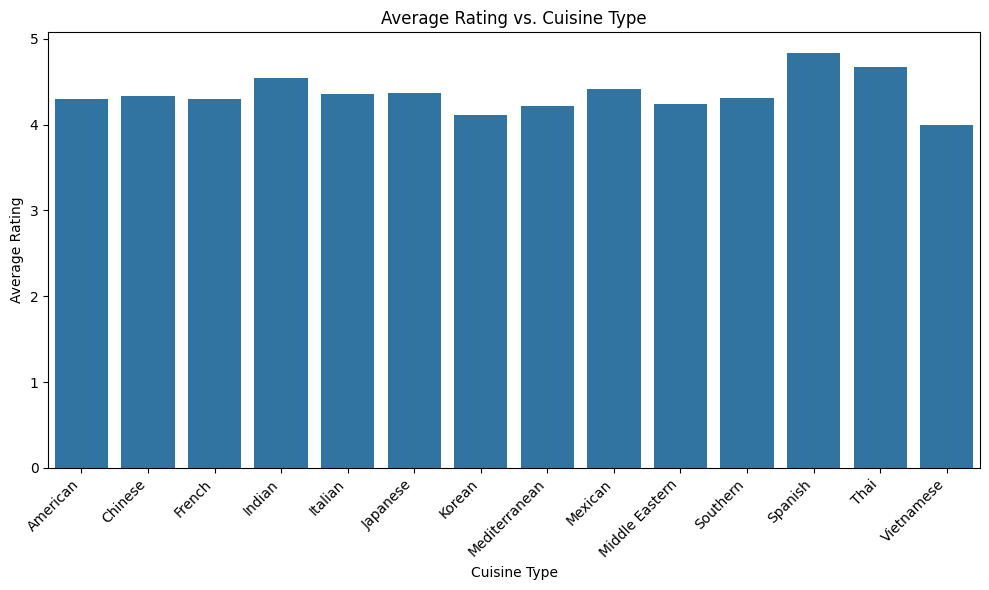

In [24]:
# Calculate the average rating for each cuisine type
average_ratings = df_filtered.groupby('cuisine_type')['rating'].mean()

# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(x=average_ratings.index, y=average_ratings.values)
plt.xlabel('Cuisine Type')
plt.ylabel('Average Rating')
plt.title('Average Rating vs. Cuisine Type')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


 plot shows that Spanish cuisine has highest average ratings followed by Thai and Indian

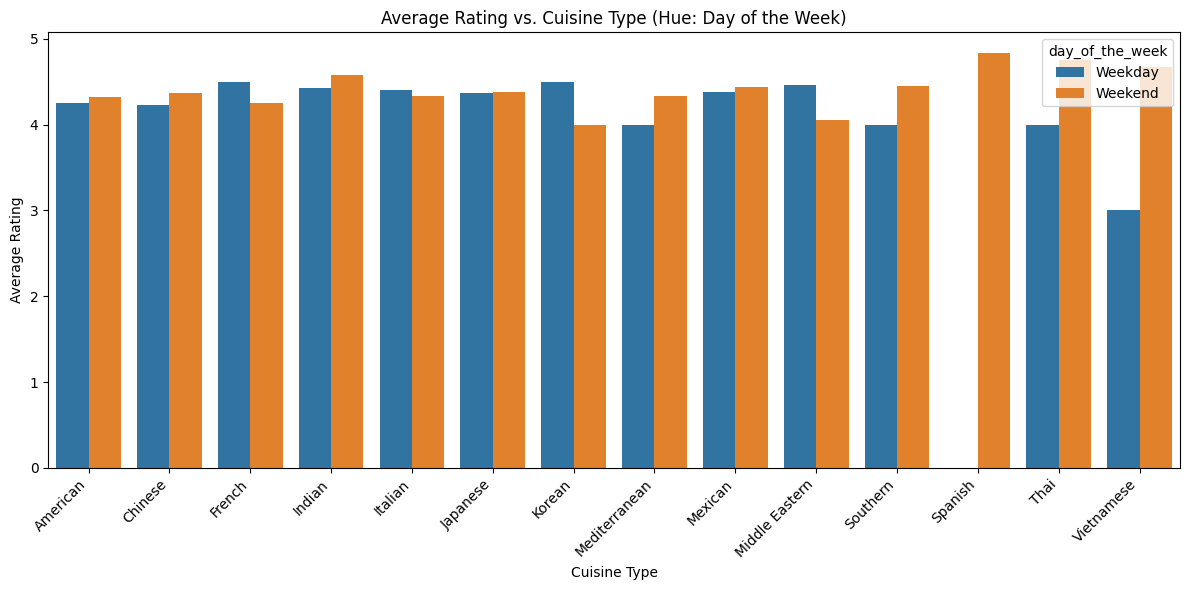

In [ ]:
# Calculate the average rating for each cuisine type and day of the week
average_ratings = df_filtered.groupby(['cuisine_type', 'day_of_the_week'])['rating'].mean().reset_index()

# Create the bar plot with hue for the day of the week
plt.figure(figsize=(12, 6))
sns.barplot(x='cuisine_type', y='rating', hue='day_of_the_week', data=average_ratings)
plt.xlabel('Cuisine Type')
plt.ylabel('Average Rating')
plt.title('Average Rating vs. Cuisine Type (Hue: Day of the Week)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Vietnamese cuisine has a average rating of 3 on weekday and average rating of 4.8 on weekends.
Spanish cuisine is the only cuisine with no weekend rating

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [25]:
# Write the code here

# Group the DataFrame by restaurant name
restaurant_groups = df_filtered.groupby('restaurant_name')

# Calculate the rating count and average rating for each restaurant
restaurant_stats = restaurant_groups['rating'].agg(['count', 'mean'])

# Filter restaurants based on the criteria
promotional_restaurants = restaurant_stats[(restaurant_stats['count'] > 50) & (restaurant_stats['mean'] > 4)]

# Display the results
promotional_restaurants

,count,mean
restaurant_name,,
Blue Ribbon Fried Chicken,64,4.328125
Blue Ribbon Sushi,73,4.219178
Shake Shack,133,4.278195
The Meatball Shop,84,4.511905


#### Observations:
Observations:
The above analysis shows four restaurants with rating count more than 50 and the average rating greater than 4:

Blue Ribbon Fried Chicken

Blue Ribbon Sushi

Shake Shack

The Meatball Shop

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [26]:
# Write the code here

# Function to calculate revenue based on order cost conditions
def calculate_revenue(cost):
    if cost > 20:
        return cost * 0.25
    elif cost > 5:
        return cost * 0.15
    else:
        return 0

# Calculate and add the 'revenue' column
df.loc[:, 'revenue'] = df['cost_of_the_order'].apply(calculate_revenue)

# Calculate the total revenue
revenue = df['revenue'].sum()

# Round the total revenue to 2 decimal places
round(revenue,2)

np.float64(6166.3)

#### Observations:
Net revenue generated across all orders is $6166.3

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [27]:
# Write the code here

# Adding a column Total time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# Conditional count function to find number of orders that took longer than 60 minutes
count=(df['total_time']>60).sum()

#total numbers of orders
total=df.shape[0]

percentage_total_time_greater_than_60=(count/total)*100
round(percentage_total_time_greater_than_60,2)

np.float64(10.54)

#### Observations:
10.54% of the orders took longer than 60 minutes

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

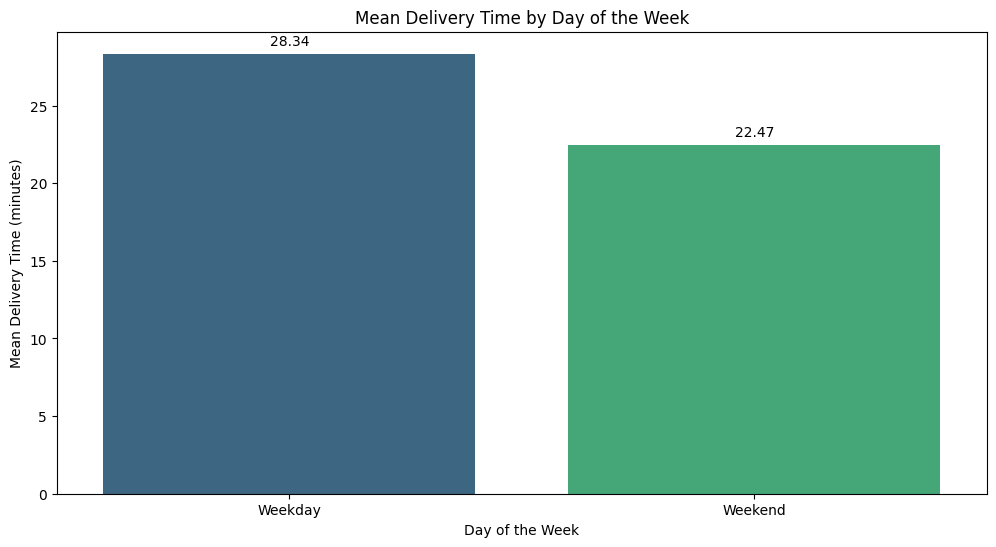

In [28]:
mean_delivery_times = df.groupby('day_of_the_week')['delivery_time'].mean().reset_index()

# Plot the mean delivery time by day of the week
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=mean_delivery_times, x='day_of_the_week', y='delivery_time', hue='day_of_the_week', palette='viridis', legend=False)

# Annotate the bars with the mean values
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

plt.xlabel('Day of the Week')
plt.ylabel('Mean Delivery Time (minutes)')
plt.title('Mean Delivery Time by Day of the Week')
plt.show()

#### Observations:
The mean delivery time of the orders on weekends is 22.47 and weekdays is 28.34

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

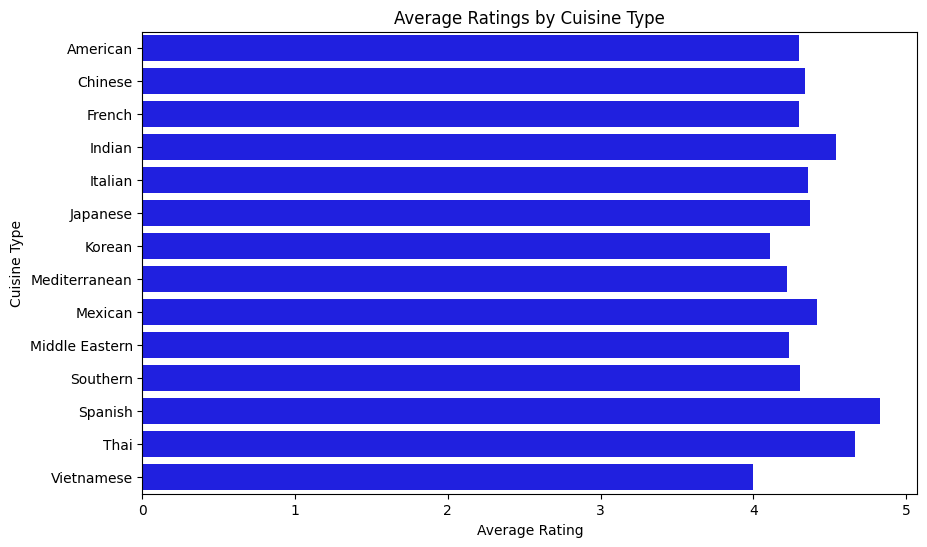

In [29]:
# Find Average Ratings by Cuisine Type

# Convert the 'rating' column to numeric, coercing errors to NaN
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Drop rows with NaN values in the 'rating' column
df_valid_ratings = df.dropna(subset=['rating'])

# Calculate the average rating for each cuisine type
average_ratings = df_valid_ratings.groupby('cuisine_type')['rating'].mean().reset_index()

# Plot the average ratings vs cuisine type
plt.figure(figsize=(10, 6))
sns.barplot(
    x='rating',
    y='cuisine_type',
    data=average_ratings,
    color='blue',
)

plt.title("Average Ratings by Cuisine Type")
plt.xlabel('Average Rating')
plt.ylabel('Cuisine Type')
plt.show()

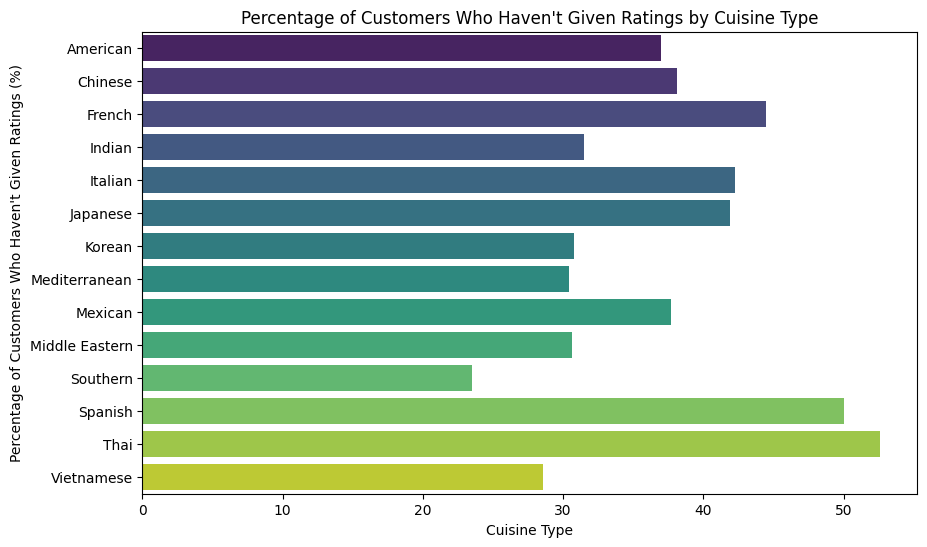

In [30]:
# Calculate the percentage of customers who haven't given ratings for each cuisine type

no_rating_percentage = df.groupby('cuisine_type')['rating'].apply(lambda x: x.isnull().mean() * 100).reset_index()
no_rating_percentage.columns = ['cuisine_type', 'no_rating_percentage']

# Plot the percentage of customers who haven't given ratings by cuisine type
plt.figure(figsize=(10, 6))
sns.barplot(data=no_rating_percentage, x='no_rating_percentage', y='cuisine_type', hue='cuisine_type', palette='viridis')

plt.xlabel('Cuisine Type')
plt.ylabel('Percentage of Customers Who Haven\'t Given Ratings (%)')
plt.title('Percentage of Customers Who Haven\'t Given Ratings by Cuisine Type')
plt.show()


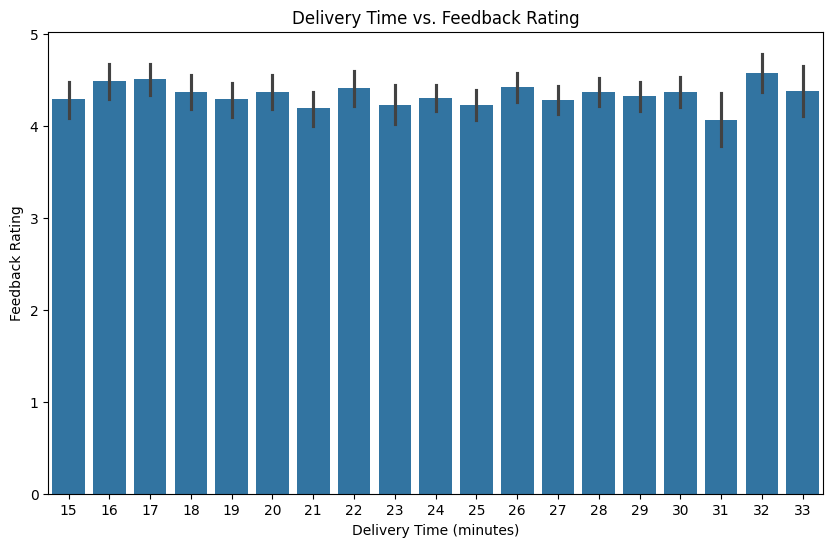

In [31]:
# Plot delivery time vs. feedback rating
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='delivery_time', y='rating')

plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Feedback Rating')
plt.title('Delivery Time vs. Feedback Rating')
plt.show()

### Conclusions:
* There are more than 50% of customers across each cuisine type who haven't given any ratings.

* Spanish cuisine has the highest average ratings, followed by Thai and Indian

* High feedback ratings indicate customer satisfaction, while lower ratings might point to areas needing improvement, such as food quality, delivery time, or customer service.
There might be a correlation between delivery time and feedback ratings. Longer delivery times could lead to lower ratings, highlighting the importance of efficient delivery

### Recommendations:

* Feature cuisine types with higher average ratings prominently on the menu or in promotions to attract more customers.  

* Encourage customers to provide feedback ratings and incentivize them to do so. This can be achieved through follow-up emails, in-app notifications, or offering discounts for future orders in exchange for feedback.

* Regularly analyze customer feedback to identify areas of improvement. Address common issues promptly to enhance customer satisfaction

---